## Bibliography
This IPython Notebook is based almost completely on:

- "_Python for Data Analysis_" by Wes McKinney, Ed. O'Reilly, 2012.

Online resources:


# Data Analysis with Python: Overview of Pandas
The aim of this session is to have a first experience with tools that should allow you to manipulate, process, clean, and crunch data using Python. By "data" we are referring to _structured data_ such as:
- multidimensional arrays
- tabular or spreadsheet-like data
- time series (no necessarily evenly spaced!)
- multiple data related by key columns
##Why Python when analyzing data?
There a considerable amount of alternatives when it comes to analyzing large sets of data such as R, MATLAB, SAS, Stata, and others. Efficient as they may be, they are often restricted to a small area of application. The versatility of Python and the growing comunity of Python users in the scientific domain has provided an remarkable improvement in its library support during the recent years, becoming a strong competitor for data manipulation tasks. Added to Python's strength as a general purpose programming language it becomes an excellent choice as a single platform to develop a data analysis application. 

Essential libraries we will be using:
- NumPy
- pandas (new!)
- matplotlib
- IPython
- SciPy


## Wetting our appetite
Before learning the basics of data analysis with pandas we will emulate author of the pandas module and start by running two examples. Do not intend to fully understand the instructions given in the next cells. They will be introduced along the session. Relax, try to understand its logic, and enjoy! ;-)

### Data from a URL shortenning service

In 2011, the URL shortenning service named bit.ly partnered with the US governement website `usa.gov` to provide a feed of anonymous data gathered from users who shorten links ending with `.gov` or `.mil`. This data (updated daily with hourly snapshots) can be downloaded as text files. Each line in the hourly snapshot data file contains a JSON (_JavaScript Object Notation_) form. 

Will work with this data using first standard built-in Python, then the `collections` module and finally, pandas.

#### Standard Python

The following lines will open such file and display its contents. Download [this data file](https://www.dropbox.com/s/5rtbbpu241lgv97/usagov_bitly_data2012-03-16-1331923249.txt?dl=0). In order to make things simple, download in the same folder where you are running this notebook. Next, execute the following the cell where the file is opened and the first line is read.

In [1]:
data_file ='/home/ramon/Downloads/usagov_bitly_data2012-03-16-1331923249.txt'
file = open(data_file)
file.readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Now instead, of opening it as a simple text file, we will load the lines in the JSON file into a dictionary object. Let us read de data set using JavaScript Object Notation `json` module (we will not cover this topic)

In [2]:
import json
#data_file = 'usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(data_file, encoding='utf-8')]

Thanks to the `json` module now variable `records` is a list of dictionaries, imported from the JSON form.

In [6]:
print("Variable records is {} and its elements are {}.".format(type(records),type(records[0])))

Variable records is <class 'list'> and its elements are <class 'dict'>.


Let us have a look at the first element:

In [7]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

As said before, this is a typical `dictionary` structure with keys and values. Find out the keys:

In [8]:
records[0].keys()

dict_keys(['a', 'c', 'nk', 'tz', 'gr', 'g', 'h', 'l', 'al', 'hh', 'r', 'u', 't', 'hc', 'cy', 'll'])

Find out the value for the key `'tz'` in this first record:

In [10]:
first_dict = records[0]
first_dict['tz']

'America/New_York'

In this case (and we were not supposed to know this) `'tz'` stands for time zone. Suppose we are interested in identifying the most commonly found time zones in the set of data we just imported. Surely, each one of you will find a different way to work around it. First, we want to obtain a list of all time zones found in the list, name the list as `list_of_timezones`: 

In [13]:
list_of_timezones = [d['tz'] for d in records]
list_of_timezones

KeyError: 'tz'

Mmmmm.... So it seems that not all records have a time zone defined, so that the corresponding dictionary lacks the `tz` key. Then, we need to check if the `tz` key is there **before** trying to access it:

In [15]:
list_of_timezones = [d['tz'] for d in records if 'tz' in d]
list_of_timezones[:5]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York']

Check the length of `list_of_timezones` and, for instance its first ten elements:

In [16]:
len(list_of_timezones)

3440

Try to think of an algorithm to count the occurences of the different timezones (including the blank field `' '`). _Hint: You might want to use a dictionary to store the occurence_ (If you can't solve it, follow [this link](https://www.dropbox.com/s/cx5wx271cg3wubz/pandas1.py?dl=0) for a possible solution , or [this link](https://www.dropbox.com/s/3muxhda21yxf7hc/pandas3.py?dl=0))

In [17]:
timezone_number = {}
for zone in list_of_timezones:
    if zone in timezone_number:
        timezone_number[zone] = timezone_number[zone] + 1
    else:
        timezone_number[zone] = 1

Because many times you are in the situation of checking whether a key is in a dictionary and, if not, giving it a starting or default value, there is a method for that, it is called `get`. Check it [here](https://docs.python.org/3.6/library/stdtypes.html#dict.get): 

In [22]:
timezone_number = {}
for zone in list_of_timezones:
        timezone_number[zone] = timezone_number.get(zone, 1) + 1

Yet, as usual in python, as counting the elements of a list is a common task, there is module for that. It is part of the Python distribution, check [here](https://docs.python.org/3.6/library/collections.html#collections.Counter):

In [27]:
from collections import Counter
timezone_number = Counter(list_of_timezones)
timezone_number

Counter({'America/New_York': 1251,
         'America/Denver': 191,
         'America/Sao_Paulo': 33,
         'Europe/Warsaw': 16,
         '': 521,
         'America/Los_Angeles': 382,
         'Asia/Hong_Kong': 10,
         'Europe/Rome': 27,
         'Africa/Ceuta': 2,
         'Europe/Madrid': 35,
         'Asia/Kuala_Lumpur': 3,
         'Asia/Nicosia': 1,
         'Europe/London': 74,
         'Pacific/Honolulu': 36,
         'America/Chicago': 400,
         'Europe/Malta': 2,
         'Europe/Lisbon': 8,
         'Europe/Paris': 14,
         'Europe/Copenhagen': 5,
         'America/Mazatlan': 1,
         'Europe/Dublin': 3,
         'Europe/Brussels': 4,
         'America/Vancouver': 12,
         'Europe/Amsterdam': 22,
         'Europe/Prague': 10,
         'Europe/Stockholm': 14,
         'America/Anchorage': 5,
         'Asia/Bangkok': 6,
         'Europe/Berlin': 28,
         'America/Rainy_River': 25,
         'Europe/Budapest': 5,
         'Asia/Tokyo': 37,
         'Euro

- How often does 'America/Sao_Paulo' appear?

In [28]:
timezone_number['America/Sao_Paulo']

33


- How many different timezones are there? 

In [29]:
len(timezone_number)

97

- Find out the top 10 time zones ([sample code](https://www.dropbox.com/s/6j9xhptguj9ooaq/pandas2.py?dl=0))

In [30]:
timezone_number.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

----
#### Collections module

The Python standard library provides the `collections` [module](https://docs.python.org/3/library/collections.html "collections module documentation page") that contains the `collections.Counter` class. This does the job that we just made but in a nicer way:

In [ ]:
import collections
print("First counter is of ", type(counter))
counter = collections.Counter(counter) #generate an instance to the Counter class using our counter variable
print("Now counter is of ", type(counter))
#The Counter class has new useful functionalities
counter.most_common(10)

### The pandas alternative
Now, let us do the same work using **pandas**. The main pandas data structure is the `DataFrame`. It can be seen as a representation of a table or spreadsheet of data. First, we will create the DataFrame from the original data file:

In [3]:
import numpy as np
import pandas as pd
myframe = pd.DataFrame(records)

`myframe` is now a DataFrame, a class introduced by pandas to efficiently work with structured data.

In [4]:
myframe

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


Check the type:

In [5]:
type(myframe)

pandas.core.frame.DataFrame

The `DataFrame` object is composed of `Series` (another pandas object), They can be seen as the _columns of a spreadsheet_. For instance, `myframe['tz']`.

In [6]:
type(myframe['tz'])

pandas.core.series.Series

Check the time zones (`'tz'`) in the first ten records of `myframe`.

In [7]:
myframe.tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

The `Series` object has a useful method: `value_counts`:

In [26]:
tz_counter = myframe['tz'].value_counts()
tz_counter.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In one line of code, all the timezones are grouped and accounted for. Check the result and get the top 5 time zones by printing the first 5 rows of `tz_counter`:

In [9]:
tz_counter[:5]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Much few lines of work, right? As we have said repeatedly, there is no need to reinvent the wheel. Probably someone out there solved your problem before you ran into it and, unless you are really really good, that solution is probably better than yours! ;-)

Next, we might want to plot the data using the matplotlib library.

In [10]:
import matplotlib.pyplot as plt

We will make an histogramatic plot:

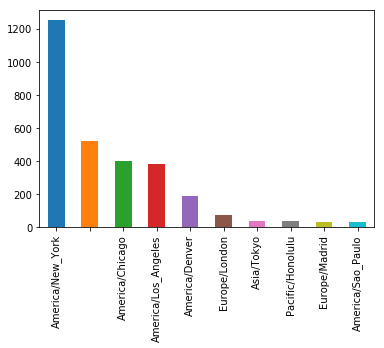

In [15]:
tz_counter[:10].plot(kind='bar')

It is kind of odd to realize that the second most popular timezone has a _blank_ label. The `DataFrame` object of pandas has a function named `fillna()` that can replace missing (NA) values or empty strings:

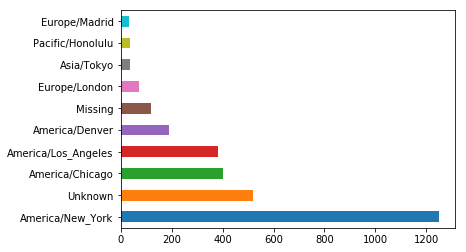

In [16]:
#First we generate new Series from a column of myframe, when a value is 'NaN' insert the word 'Missing'
clean_tz = myframe['tz'].fillna('Missing')
#In this new Series replace EMPTY VALUES with the word 'Unknown'. Try to understand BOOLEAN INDEXING
clean_tz[clean_tz == ''] = 'Unknown'
#Use the method VALUE_COUNTS to generate a new Series containing time zones and occurrences
tz_counter = clean_tz.value_counts()
#Finally, plot the top ten values
tz_counter[:10].plot(kind='barh', rot=0)

---
Let's complicate the example a bit more. The `'a'` field in the datasheet contains information on the browser used to perform the URL shortening. For example, check the content of the `'a'` field in the first record of `myframe`:

In [22]:
myframe.a[0].split()

['Mozilla/5.0',
 '(Windows',
 'NT',
 '6.1;',
 'WOW64)',
 'AppleWebKit/535.11',
 '(KHTML,',
 'like',
 'Gecko)',
 'Chrome/17.0.963.78',
 'Safari/535.11']

Let's generate a `Series` from the datasheet containing all the browser data: try to understand the following line. A good strategy might be to work it out by pieces:
```python
myframe.a
myframe.a.dropna()
```

In [23]:
browser = pd.Series([x.split()[0] for x in myframe.a.dropna()])

As we did with the time zones, we can use the `value_counts` method on the browser `Series` to see the most common browsers:

In [25]:
browser.value_counts().head()

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

Let's decompose the top time zones into people using Windows and not using Windows. This piece of code requires some more knowledge of pandas, skip the details for now:

In [27]:
#Create a new frame using only the entries with a valid 'a'
cframe = myframe[myframe.a.notnull()]
#Create an array according to whether 'a' is Windows or not
os = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

`os` is a NumPy array with as many elements as entries in `cframe` and each element states whether the corresponding row in `cframe` is a Windows Operating System or not.
Using this information, let us tell Pandas to GROUP the information according to the TIMEZONE (`'tz'`) and the Operating System:

In [28]:
tz_and_os = cframe.groupby(['tz',os])
agg_counter = tz_and_os.size().unstack().fillna(0)
agg_counter[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


Let's select the top overall time zones. To do so, we construct an indirect index array from the row counts in `agg_counter`

In [29]:
#Use to sort in ascending order
indexer = agg_counter.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

Next, use `take` to select the rows in that order and then slice off the last 10 rows:

In [30]:
count_subset = agg_counter.take(indexer)[-10:]

In [31]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


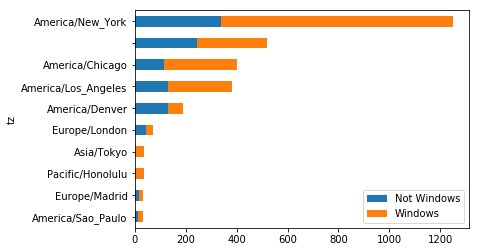

In [32]:
count_subset.plot(kind='barh', stacked='True')

Same plot, but percentages instead of absolute numbers

In [ ]:
subset_normalized = count_subset.div(count_subset.sum(1), axis=0)
subset_normalized.plot(kind='barh', stacked='True')

### Baby Names

Open the following link in a new tab of your web browser: [baby names](http://www.ssa.gov/oact/babynames/limits.html). Download the file named "National Data", unpack it an have a look at any of the text files. These are CSV files containing statistics on the name of US born babies distinguishing sex.

In [1]:
import pandas as pd

As an example, let us read data from year 1998. We use a pandas function to read the CSV file and name the columns.

In [2]:
names1998 = pd.read_csv('/home/ramon/Downloads/names/yob1998.txt', names=['name', 'sex','births'])

In [3]:
type(names1998)

pandas.core.frame.DataFrame

Using pandas it is really simple to, for instance, sum all the elements of a DataStructure according to a column value. How many boys and girls were born in 1998?

In [5]:
names1998.groupby('sex').births.sum()

sex
F    1766358
M    1910749
Name: births, dtype: int64

In [7]:
names1998.describe()

,births
count,27899.000000
mean,131.800674
std,997.995351
min,5.000000
25%,6.000000
50%,11.000000
75%,28.000000
max,36614.000000


Instead of working with just 1998, let us read all the records!

In [ ]:
year_range = range(1880,2018)
pieces =[]
columns = ['name','sex','births']
for year in year_range:
    data_file = 'names/yob{}.txt'.format(year)
    #read the data for a given year in a DataStructure like before
    myframe = pd.read_csv(data_file, names=columns)  
    
    #add an extra column to the DataStructure assign it an index and
    # broadcast a value
    myframe['year'] = year
    #pieces is a Python list containing DataStructures as elements, one
    # for each year
    pieces.append(myframe)
#concatenate results in a single DataFrame
# pd.concat concatenates rows
# ignore_index=True ignores the row number in the read_csv
names = pd.concat(pieces, ignore_index=True)

Dare have a look at the complete new DataStructure?

In [ ]:
names

Build a table summing all names (births) male and female (columns) for each year (rows)

In [ ]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

We will see more on `pivot_table` later on. For now, let's just plot the results:

In [ ]:
total_births.plot(title='Total births by sex and year')

Let's insert in the DataStructure a new column named `ratio` with the fraction of babies given each name relative to the total number of births. We group the data by year and sex, then add the new column to each group: _use a function_

In [ ]:
def add_ratio(group):
    births = group.births.astype(float)
    group['ratio'] = births/births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_ratio)

Check that `ratio` column sums one.  We use the `np.allclose` NumPy function to check if the result is numerically one.

In [ ]:
np.allclose(names.groupby(['year','sex']).ratio.sum(), 1)

Extract the top 1000 names for each sex/year combination.

In [ ]:
def get_top(group,topn=1000):
    return group.sort_values(by='births', ascending=False)[:topn]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top)

**Analyzing Naming Trends**

In [ ]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [ ]:
subset = total_births[['Kevin', 'Arthur', 'Mary', 'Marilyn']]

In [ ]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

A simple explanation for the decreasing trend in the previous plots is that fewer parents are choosing "common names" for their children. Let's explore this hypotesis by summing the top1000 baby names of boys and girls.

In [ ]:
table = top1000.pivot_table('ratio', index='year',columns='sex', aggfunc = sum)
table.plot(title='Sum of table1000.ratio by year and sex', yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

Indeed, the overall sum decreases in time, new names are appearing then  and diversity causes to top1000 ratio to be below 1.

Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births. This can be a little bit involved. Let's take first boy names from 2010:

In [ ]:
boys_in_2010 = boys[boys.year == 2010]

How many of the most popular names it takes to reach 50%?

In [ ]:
ratio_cumulative_sum = df.sort_values(by='ratio', ascending=False).ratio.cumsum()
ratio_cumulative_sum[:10]

In [ ]:
ratio_cumulative_sum.values.searchsorted(0.5) #missprint with respect to the book? (page 38)

Since the first index is 0, we should add an aditional 1 and the result is 117 names for the 50% of baby boys.

How was this diversity in 1900?

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='ratio', ascending=False).ratio.cumsum()
in1900.values.searchsorted(0.5) + 1 #additional considering first index is 0

Only 25 account for 50% of the births in 1900. Can we apply this operation to each year & sex combination? `groupby` the `year` and `sex` fields and apply a function to return the count for each group:

In [ ]:
def get_50percent_count(group, q=0.5):
    group = group.sort_values(by='ratio', ascending=False)
    return group.ratio.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year','sex']).apply(get_50percent_count)
diversity = diversity.unstack('sex')

The resulting DataFrame  `diversity` has two time series, one for each sex, indexed by year.

In [ ]:
diversity

In [ ]:
diversity.plot(title='Number of popular names in top50%')

It looks like parents (in the US?) are more creative when it comes to look for names for their daughters rather than sons, right? And this has been more so over the years!

After these two examples. We will go through the basics of pandas.

***
## DataFrames and Series

The two basic Data Structures introduced by pandas are `DataFrame` and `Series`.


In [ ]:
from pandas import Series, DataFrame

### Series

A `Series` is a one-dimensional array-like object containing an array of data (any NumPy data type is fine) and associated array of _data labels_, called _index_. The simplest Series one can think of would be formed only by an array of data:

In [ ]:
o1 = Series([-4, 7, 11, 13, -22])
o1

Notice that the representation of the Series shows the index on the left and the values on the right. No index was specified when the Series was created and a default one has been assigned: integer number from 0 to N-1 (N would be de length of the data array).

In [ ]:
o1.values

In [ ]:
o1.index

If we need to specify the index:

In [ ]:
o2 = Series([7, 0.2, 11.3, -5], index=['d','e','a','z'])

In [ ]:
o2

In [ ]:
o2.index

Unlike NumPy arrays, we can use values in the index when selecting single values from a set of values:

In [ ]:
o2['e']

In [ ]:
o2[['z','d']]

NumPy array operations, such as masking using a boolean array, scalar broadcasting, or applying mathematical functions, preserve the index-value link:

In [ ]:
o2[o2 > 0] #filter positive elements in o2, check indices!!!

In [ ]:
o2*np.pi

Pandas `Series` have also been described as a fixed.length, ordered _dictionary_, since it actually maps index values to data values. Many functions that expect a `dict` can be used with `Series`:

In [ ]:
'z' in o2

A Python dictionary can be used to create a pandas Series, here is a list of the top 5 most populated cities according to [Wikipedia](http://en.wikipedia.org/wiki/List_of_cities_proper_by_population):

In [ ]:
pop_data = {'Shanghai': 24150000, 'Karachi': 23500000, 'Beijing': 21516000, 'Tianjin': 14722000, 'Istanbul': 14377000}
print ("pop_data is of type ",type(sdata))

In [ ]:
ser1 = Series(pop_data)
print("ser1 is of type ",type(ser1))
print("Indices of the Series are: ",ser1.index)
print("Values of the Series are: ",ser1.values)

As you just checked, when passing the dictionary the resulting Series uses the `dict` keys as indices and sorts the values corresponding to the index.

In the next case we create a `Series` from a dictionary but selecting the indices we are interested in:

In [ ]:
cities = ['Karachi', 'Istanbul', 'Beijing', 'Moscow']
ser2 = Series(pop_data, index=cities)
ser2

Note that the values found in `pop_data` have been placed in the appropiate locations. No data was found for `'Moscow'` and value `NaN` is assigned. This is used in pandas to mark missing or not available (NA) values. In order to detect missing data in pandas, one should use the `isnull` and `notnull` (both present as functions and Series methods):

In [ ]:
pd.isnull(ser2)

In [ ]:
ser2.isnull()

In [ ]:
ser2.notnull()

An important feature of Series to be highlighted here is that Series are automatically aligned when performing arithmetic operations. It doesn't make much sense to add the population data but...

In [ ]:
ser1 + ser2

We can assign names to both the Series object and its index using the `name` attribute:

In [ ]:
ser1.name = 'population'
ser1.index.name = 'city'
ser1

### DataFrame

The `DataFrame` object represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value `type`. The `DataFrame` has both a row and column index and it can be seen as a `dictionary` of `Series`. Under the hood, the data is stored as one or more 2D blocks rather than a list, dict, or some other collection of 1D arrays. See the following example:

In [ ]:
data = {'city': ['Madrid', 'Madrid','Madrid','Barcelona','Barcelona','Sevilla','Sevilla','Girona','Girona','Girona'],
       'year': ['2002', '2006', '2010', '2006', '2010', '2002', '2010', '2002', '2006', '2010'],
       'pop': [5478405, 5953604, 6373532, 5221848, 5488633, 1732697, 1902956, 568690, 668911, 741841]}
pop_frame = DataFrame(data)

In [ ]:
pop_frame

The resulting `DataFrame` has automatically assigned indices and the columns are sorted. This order can be altered if we specify a sequence of colums:

In [ ]:
DataFrame(data, columns=['year','city','pop'])

You should keep in mind that indices in the DataFrame are `Index objects`, they have attributes (such as name as we will see) and are immutable.

What will happen if we pass a column that is not contained in the data set?

In [ ]:
pop_frame2 = DataFrame(data, columns=['year','city','pop','births'])
pop_frame2

A column in a `DataFrame` can be retrieved as a Series in two ways:

- using dict-like notation

In [ ]:
pop_frame2['city']

- using the `DataFrame` attribute

In [ ]:
pop_frame2.city

Columns can be modified by assignment. Let's get rid of those NA values in the births column:

In [ ]:
pop_frame2['births'] = 100000
pop_frame2

When assigning lists or arrays to a column, the values' length must match the length of the DataFrame. If we assign a Series it will be instead conformed exactly to the DataFrame's index, inserting missing values in any holes:

In [ ]:
birth_series = Series([100000, 15000, 98000], index=[0,2,3])

In [ ]:
pop_frame2['births'] = birth_series
pop_frame2

Assigning a column that doesn't exist will result in creating a new column. Columns can be deleted using the `del` command:

In [ ]:
pop_frame2['Catalunya'] = ((pop_frame2.city == 'Barcelona') | (pop_frame2.city == 'Girona'))
pop_frame2

In [ ]:
del pop_frame2['Catalunya']
pop_frame2.columns

Alternatively, the `DataFrame` can be built from a nested `dict` of `dicts`:

In [ ]:
pop_data = {'Madrid': {'2002': 5478405, '2006': 5953604, '2010': 6373532}, 
            'Barcelona': {'2006': 5221848, '2010': 5488633}, 'Sevilla': {'2002': 1732697, '2010': 1902956}, 
            'Girona': {'2002': 568690, '2006': 668911, '2010': 741841}}
pop_frame3 = DataFrame(pop_data)
pop_frame3

The outer dict keys act as the columns and the inner keys as the unioned row indices. Possible data inputs to construct a `DataFrame`:

- 2D NumPy array
- dict of arrays, lists, or tuples
- dict of Series
- dict of dicts
- list of dicts or Series
- List of lists or tuples
- DataFrames
- NumPy masked array

As in `Series`, the `index` and `columns` in a `DataFrame` have `name` attributes:

In [ ]:
pop_frame3.columns.name = 'city'; pop_frame3.index.name = 'year'
pop_frame3

Similarly, the `values` attribute returns de data contained in the DataFrame as a 2D array:

In [ ]:
pop_frame3.values

## Basic functionality

We do not have time in this session to go through all the possible operations using Pandas and the related data structures. We will try to cover some of the basics.

### Reindexing
A critical method in pandas is `reindex`. This implies creating a new object with the data of a given structure but _conformed_ to a new index. For instance:

1. Extract the column of pop_frame3 belonging to `Barcelona`
2. Check the type of the column, it should be a `Series`
3. Find out the indices of the `Barcelona Series`

Call `reindex` on the `Barcelona Series` to rearrange the data to a new index [2010, 2008, 2006, 2004, 2002], following this example:
```python
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
```

The `reindex` method can be combined with the `fill_value=` option in the non existing values:
```python
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)
```

It does'nt make much sense in this case to estimate the non-existing values as zeros. For ordered data such as time series, we can use interpolation or foward/backward filling.

___
In the case of DataFrames, `reindex` can alter either (row) index, column or both.

In [ ]:
#Inverting the row indices and adding some more years
years = ['2010', '2008', '2006', '2004', '2002']
pop_frame4 = pop_frame3.reindex(years)

If instead we want to reindex the columns, we need to use the `columns` keyword:

In [ ]:
cities = ['Madrid', 'Sevilla','Barcelona', 'Girona']
pop_frame4 = pop_frame4.reindex(columns=cities)

Both at once:

In [ ]:
pop_frame4 = pop_frame3.reindex(index = years, columns = cities)

`reindex` [function arguments](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

### Dropping entries from an axis
From the Barcelona population Series let's get rid of years 2002 and 2008:

In [ ]:
pop_bcn2.drop(['2002', '2008'])

Check that the object was not modified.

In DataFrame, index values can be deleted from both axes. Use the IPython help to find out the use of `drop` and get rid of all the data related to Madrid and year 2002:

### Indexing, selection, and filtering

#### Series
Indexing in `Series` works similarly to NumPy array indexing. The main difference is that we can actually use the Serie's index instead of integer numbers

In [ ]:
pop_bcn2.index.name = 'year'

Population in Barcelona in year 2006?

Boolean indexing, non-zero data in Barcelona?

In [ ]:
#BORRAR
pop_bcn2[pop_bcn2 != 0]

__Important__: Slicing with labels behaves differently than normal Python slicing **the endpoint is inclusive**! Give it a try:

In [ ]:
pop_bcn2[:2]

In [ ]:
pop_bcn2['2002':'2006']